<h1 align="center">Web Scraping Using Selenium and Beautiful Soup</h1>
    <Name>
    <Class>
    <Date>

In [1]:
import re
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

## Problem 1
Modify `wunder_temp()` (below) so that it gathers the Actual Mean Temperature, Actual Max Temperature, and Actual Min Temperature for every day in July of 2012.
Plot these three measurements against time on the same plot.
Consider printing information at each iteration of the outer loop to keep track of the program’s progress.

Display the plot inline below.

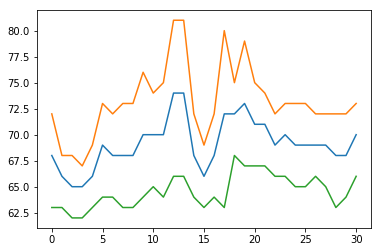

In [11]:
# Problem 1
def wunder_temp(day="/history/airport/KSAN/2012/7/1/DailyHistory.html"):
    """Crawl through Weather Underground and extract temperature data."""
    # Initialize variables, including a regex for finding the 'Next Day' link.
    actual_mean_temp = []
    actual_max_temp=[]
    actual_min_temp=[]
    next_day_finder = re.compile(r"Next Day")
    base_url = "https://www.wunderground.com"       # Web page base URL.
    page = base_url + day                           # Complete page URL.
    current = None

    for _ in range(31):
        while current is None:  # Try downloading until it works.
            # Download the page source and PAUSE before continuing.
            page_source = requests.get(page).text
            time.sleep(.5)           # PAUSE before continuing.
            soup = BeautifulSoup(page_source, "html.parser")
            current = soup.find(string="Mean Temperature")
            current1 = soup.find(string="Max Temperature")
            current2 = soup.find(string="Min Temperature")

        # Navigate to the relevant tag, then extract the temperature data.
        temp_tag = current.parent.parent.next_sibling.next_sibling.span.span
        actual_mean_temp.append(int(temp_tag.string))
        temp_tag1 = current1.parent.parent.next_sibling.next_sibling.span.span
        actual_max_temp.append(int(temp_tag1.string))
        temp_tag2 = current2.parent.parent.next_sibling.next_sibling.span.span
        actual_min_temp.append(int(temp_tag2.string))

        # Find the URL for the page with the next day's data.
        new_day = soup.find(string=next_day_finder).parent["href"]
        page = base_url + new_day                   # New complete page URL.
        current = None
    X=range(len(actual_mean_temp))
    plt.plot(X,actual_mean_temp)
    plt.plot(X,actual_max_temp)
    plt.plot(X,actual_min_temp)
    plt.show()

wunder_temp()

## Problem 2

Modify `bank_data()` so that it extracts the total consolidated assets ("Consol Assets") for JPMorgan Chase, Bank of America, and Wells Fargo recorded each December from 2004 to the present.
In a single figure, plot each bank’s assets against time.
Be careful to keep the data sorted by date.

Display the plot inline below.

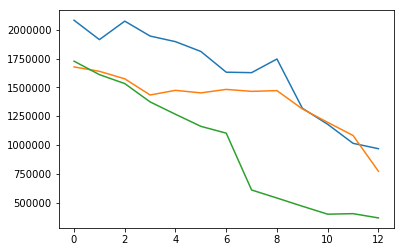

In [19]:
# Problem 2
def bank_data():
    """Crawl through the Federal Reserve site and extract bank data."""
    # Compile regular expressions for finding certain tags.
    link_finder = re.compile(r"December(\w|\s)*,(\w|\s)*20(04|05|06|07|08|09|10|11|12|13|14|15|16|17)$")
    chase_bank_finder = re.compile(r"^JPMORGAN CHASE BK")
    boa_bank_finder = re.compile(r"^BANK OF AMER NA")
    wells_bank_finder = re.compile(r"^WELLS FARGO BK")

    # Get the base page and find the URLs to all other relevant pages.
    base_url="https://www.federalreserve.gov/releases/lbr/"
    base_page_source = requests.get(base_url).text
    base_soup = BeautifulSoup(base_page_source, "html.parser")
    link_tags = base_soup.find_all(name='a', href=True, string=link_finder)
    pages = [base_url + tag.attrs["href"] for tag in link_tags]

    # Crawl through the individual pages and record the data.
    chase_assets = []
    boa_assets=[]
    wells_assets=[]
    for page in pages:
        soup = BeautifulSoup(requests.get(page).text, "html.parser")
        time.sleep(1) 
        # Find the tag corresponding to Chase Banks's consolidated assets.
        temp_tag = soup.find(name="td", string=chase_bank_finder)
        temp_tag1 = soup.find(name="td", string=boa_bank_finder)
        temp_tag2 = soup.find(name="td", string=wells_bank_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
            temp_tag1 = temp_tag1.next_sibling
            temp_tag2 = temp_tag2.next_sibling
        # Extract the data, removing commas.
        chase_assets.append(int(temp_tag.string.replace(',', '')))
        boa_assets.append(int(temp_tag1.string.replace(',', '')))
        wells_assets.append(int(temp_tag2.string.replace(',', '')))

    X=range(len(chase_assets))
    plt.plot(X,chase_assets)
    plt.plot(X,boa_assets)
    plt.plot(X,wells_assets)
    plt.title("Problem 2")
    plt.show()
    #return chase_assets, boa_assets, wells_assets

bank_data()

## Problem 3

ESPN hosts data on NBA athletes at http://www.espn.go.com/nba/statistics.
Each player has their own page with detailed performance statistics.
For each of the five offensive leaders in points and each of the five defensive leaders in rebounds, extract the player's career minutes per game (MPG) and career points per game (PPG).
Make a scatter plot of MPG against PPG for these ten players.

Display the plot inline below.

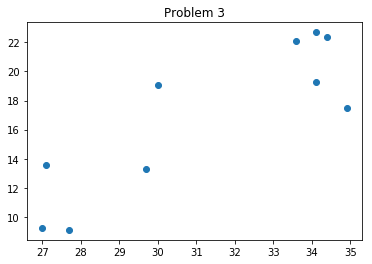

In [113]:
# Problem 3
def espn():
    defense_mpg = []
    defense_ppg=[]
    offense_mpg=[]
    offense_ppg=[]
    next_day_finder = re.compile(r"Next Day")
    base_url = "https://www.espn.com/nba/statistics" # Web page base URL.
    offense = base_url
    defense = base_url
    current = None

    while current is None: 
        current = requests.get(base_url).text
        offense=current
        time.sleep(1)           # PAUSE before continuing.
        soup = BeautifulSoup(offense, "html5lib")
    player = soup.find(string="POINTS").parent.parent.next_sibling.parent
    #print(player)
    l=0
    links=re.compile(r"[1-5]\.\ \<a href=\"https://www.espn.com/nba/player/_/id/[0-9]+/\w+\-\w+")
    links=links.findall(str(player))
    nums=re.compile(r"[0-9]+\.[0-9]")
    mpglist=[]
    ppglist=[]
    for i in links:
        i=i[12:]
        this=requests.get(i).text
        soup=BeautifulSoup(this,"html5lib")
        stat=soup.find(string="STATS").parent.parent.next_sibling
        if l==3:
            row=stat.find_all(name="tr")[2]
        else:
            row=stat.find_all(name="tr")[3]
        l+=1
        column=row.find_all(name="td")
        MPG=nums.findall(str(column[2]))
        PPG=nums.findall(str(column[-1]))
        #print(MPG,PPG)
        mpglist.append(float(MPG[0]))
        ppglist.append(float(PPG[0]))
    #defense
    current=None
    while current is None: 
        current = requests.get(base_url).text
        defense=current
        time.sleep(1)           # PAUSE before continuing.
        soup = BeautifulSoup(defense, "html5lib")
    player = soup.find(string="REBOUNDS").parent.parent.next_sibling.parent
    #print(player)
    links=re.compile(r"[1-5]\.\ \<a href=\"https://www.espn.com/nba/player/_/id/[0-9]+/\w+\-\w+")
    links=links.findall(str(player))
    nums=re.compile(r"[0-9]+\.[0-9]")
    k=[0,1]
    l=0
    for i in links:
        i=i[12:]
        current=requests.get(i).text
        soup=BeautifulSoup(current,"html5lib")
        stat=soup.find(string="STATS").parent.parent.next_sibling
        if l in k:
            row=stat.find_all(name="tr")[2]
        else:
            row=stat.find_all(name="tr")[3]
        #print(row)
        l+=1
        column=row.find_all(name="td")
        MPG=nums.findall(str(column[2]))
        PPG=nums.findall(str(column[-1]))
        #print(MPG, PPG)
        mpglist.append(float(MPG[0]))
        ppglist.append(float(PPG[0]))
    plt.plot(mpglist,ppglist,'o')
    plt.title("Problem 3")
    plt.show()
        

espn()

## Problem 4

Write a function that accepts a string to serve as a search query.
Use Selenium to enter the query into the search bar of https://arxiv.org and press Enter.
The resulting page has up to 25 links to the PDFs of technical papers that match the query.
Gather these URLs, then continue to the next page (if there are more results) and continue gathering links until obtaining at most 100 URLs.

Print the list of URLs below.

In [163]:
# Problem 4
def query(input):
    urls=[]
    browser=webdriver.Chrome()
    length=0
    try:
        browser.get("https://arxiv.org/")
        try:
            
            search_bar=browser.find_element_by_name('query')
            search_bar.clear()
            search_bar.send_keys(input)
            search_bar.send_keys(Keys.RETURN)
            while length<=100:
                try:
                    soup=BeautifulSoup(browser.page_source, "html.parser")
                    found=soup.find_all(name="a", href=True, string="pdf")
                    for j in found:
                        if length>=100:
                            length=1000
                            break
                        urls.append(j["href"])
                        length+=1
                    page=browser.find_element_by_link_text('Next 25 results')
                    page.send_keys(Keys.RETURN)
                except NoSuchElementException:
                    break
        except NoSuchElementException:
            print("No such element")
            raise
    finally:
        browser.close()
    return urls
    

query("astronomy")

['/pdf/adap-org/9808002',
 '/pdf/astro-ph/9804185',
 '/pdf/astro-ph/9804184',
 '/pdf/astro-ph/9804171',
 '/pdf/astro-ph/9804169',
 '/pdf/astro-ph/9804143',
 '/pdf/astro-ph/9804136',
 '/pdf/astro-ph/9804131',
 '/pdf/astro-ph/9804130',
 '/pdf/astro-ph/9804122',
 '/pdf/astro-ph/9804120',
 '/pdf/astro-ph/9804119',
 '/pdf/astro-ph/9804116',
 '/pdf/astro-ph/9804109',
 '/pdf/astro-ph/9804104',
 '/pdf/astro-ph/9804096',
 '/pdf/astro-ph/9804088',
 '/pdf/astro-ph/9804085',
 '/pdf/astro-ph/9804072',
 '/pdf/astro-ph/9804063',
 '/pdf/astro-ph/9804060',
 '/pdf/astro-ph/9804056',
 '/pdf/astro-ph/9804055',
 '/pdf/astro-ph/9804052',
 '/pdf/astro-ph/9804046',
 '/pdf/astro-ph/9804032',
 '/pdf/astro-ph/9804025',
 '/pdf/astro-ph/9804020',
 '/pdf/astro-ph/9804013',
 '/pdf/astro-ph/9803343',
 '/pdf/astro-ph/9803338',
 '/pdf/astro-ph/9803336',
 '/pdf/astro-ph/9803334',
 '/pdf/astro-ph/9803333',
 '/pdf/astro-ph/9803315',
 '/pdf/astro-ph/9803312',
 '/pdf/astro-ph/9803300',
 '/pdf/astro-ph/9803299',
 '/pdf/astro

## Problem 5

Project Euler (https://projecteuler.net) is a collection of mathematical computing problems.
Each problem is listed with an ID, a description/title, and the number of users that have solved the problem.

Using Selenium, BeautifulSoup, or both, for each of the (at least) 600 problems in the archive at https://projecteuler.net/archives, record the problem ID and the number of people who have solved it.
Return a list of IDs, sorted from largest to smallest by the number of people who have solved them.
That is, the first entry in the list should be the ID of the most solved problem, and the last entry in the list should be the ID of the least solved problem.

Print the list of problems IDs below.

In [243]:
# Problem 5
def euler():
    urls=dict()
    browser=webdriver.Chrome()
    length=0
    try:
        browser.get("https://projecteuler.net/archives")
        try:
            k=2
            while length<=700:
                try:
                    soup=BeautifulSoup(browser.page_source, "html.parser")
                    found=soup.find_all(name="td")
                    #print(solved)
                    j=0
                    while j+2 <= len(found):
                        #print(found[j],found[j+2])
                        urls[int(found[j].string)]= int(found[j+2].string)
                        j+=3
                        length+=1
                    #print(length)
                    page=browser.find_element_by_partial_link_text(str(k))
                    #print(page)
                    k+=1
                    page.send_keys(Keys.RETURN)
                except NoSuchElementException:
                    break
        except NoSuchElementException:
            print("No such element")
            raise
    finally:
        browser.close()
    return sorted(urls, key=urls.get)

euler()

[585,
 579,
 597,
 566,
 591,
 584,
 589,
 559,
 594,
 586,
 541,
 562,
 478,
 483,
 573,
 578,
 529,
 553,
 554,
 494,
 544,
 514,
 556,
 495,
 507,
 482,
 489,
 450,
 546,
 505,
 547,
 580,
 471,
 508,
 524,
 465,
 542,
 590,
 453,
 576,
 470,
 484,
 488,
 558,
 564,
 481,
 560,
 490,
 568,
 459,
 567,
 522,
 592,
 599,
 570,
 486,
 477,
 447,
 428,
 502,
 574,
 468,
 426,
 550,
 422,
 472,
 528,
 536,
 582,
 496,
 596,
 464,
 563,
 376,
 397,
 427,
 557,
 410,
 416,
 414,
 466,
 462,
 444,
 499,
 532,
 438,
 535,
 385,
 513,
 391,
 534,
 415,
 572,
 448,
 492,
 526,
 533,
 538,
 344,
 503,
 361,
 439,
 446,
 583,
 440,
 519,
 404,
 434,
 445,
 460,
 338,
 382,
 441,
 598,
 384,
 474,
 530,
 373,
 569,
 403,
 552,
 398,
 331,
 406,
 511,
 588,
 402,
 424,
 520,
 413,
 442,
 475,
 593,
 328,
 551,
 467,
 319,
 476,
 456,
 420,
 372,
 354,
 515,
 498,
 600,
 423,
 497,
 436,
 409,
 517,
 432,
 525,
 545,
 575,
 454,
 412,
 400,
 311,
 433,
 334,
 322,
 353,
 362,
 350,
 537,
 595,
 369